<a href="https://colab.research.google.com/github/illuly/Python/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_02_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
import numpy as np

In [ ]:
features = iris.data
features

# 데이터 셋 불러오기

In [ ]:
iris = load_iris() #데이터 셋 불러오기
iris

In [ ]:
features = iris.data #데이터를 프레임으로 변환
features
label = iris.target
label

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
kfold = KFold(n_splits=5) #5개 폴드 세트로 분리하는 kfold 객체
cv_accuracy = [] #객체 담을 리스트 객체 생성
features.shape[0]
print(kfold)

In [ ]:
n_iter = 0

for train_index , test_index in kfold.split(features): #kfold 객체의 split 호출하여 학습용, 검증용 테스트 로우 인덱스 array 변환
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(x_train,y_train) # 학습
  pred = dt_clf.predict(x_test) #예측
  n_iter += 1   #반복시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)

  train_size = x_train.shape[0]
  test_size = x_test.shape[0]
  print(n_iter, accuracy, train_size, test_size)
  #print(.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

print('\n평균 검증 정확도', np.mean(cv_accuracy))




1 1.0 120 30
2 0.9667 120 30
3 0.8667 120 30
4 0.9333 120 30
5 0.7333 120 30

평균 검증 정확도 0.9


In [ ]:
features[1]

array([4.9, 3. , 1.4, 0.2])

In [ ]:
import pandas as pd

In [ ]:
iris_pd = pd.DataFrame(data = features,columns=iris.feature_names)
iris_pd

In [ ]:
iris.target

In [ ]:
iris_pd.head(3)

In [ ]:
print(iris)

교차검증 API -> cross_val_score(불균형한 데이터 분포도에 사용)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
data = iris_data.data
label = iris_data.target

In [ ]:
print(data)
print(label)

In [ ]:
#성능 지표는 정확도, 교차 검증 3개
scores = cross_val_score(dt_clf, data,label,scoring='accuracy',cv=10) #분류냐 회귀나, 피쳐 데이터, 라벨데이터, 예측성능평가지수, 교차검증수
print('1', np.round(scores,4))
print('2', np,round(np.mean(scores),4))

1 [1.     0.9333 1.     0.9333 0.9333 0.8667 0.9333 0.9333 1.     1.    ]
2 <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'> 0.9533


GridSearchCV -> 교차검증 & 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris_data = load_iris()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

In [ ]:
grid_tree = GridSearchCV(dtree, param_grid= parameters, cv=3, refit=True)

In [ ]:
grid_tree.fit(x_train, y_train)

데이터 전처리 방법

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
items = ['kim','choi','jung']

In [ ]:
encoder = LabelEncoder()
fit = encoder.fit(items)
label = encoder.transform(items)

In [ ]:
label

array([2, 0, 1])

In [ ]:
fit

LabelEncoder()

In [ ]:
encoder.classes_

array(['choi', 'jung', 'kim'], dtype='<U4')

원핫 인코더 변경

In [ ]:
import numpy as np

In [ ]:
items = ['dog','cat','child']

In [ ]:
items = np.array(items).reshape(-1,1) #2차원 배열로 변경 -1은 남은 배열의 길이와 남은 차원으로부터 추정해서 알아서 지정하라는 의미
items

array([['dog'],
       ['cat'],
       ['child']], dtype='<U5')

In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoders = OneHotEncoder()
encoders.fit(items)
label = encoders.transform(items)

In [ ]:
label

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
print(label)

  (0, 2)	1.0
  (1, 0)	1.0
  (2, 1)	1.0


In [ ]:
print(label.toarray())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


데이터 표준화 작업

In [2]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd

In [6]:
iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris_data = iris.data


In [8]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

In [10]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [12]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

# 표준화 정규화 객체 StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [17]:
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [19]:
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)

In [20]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [21]:
iris_df_scaled.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [22]:
iris_df_scaled.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler() #객체 생성

In [ ]:
scaler.fit(iris_df)
scaler

In [28]:
iris_scaled = scaler.transform(iris_df)


In [ ]:
iris_scaled

In [30]:
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

In [31]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [32]:
iris_df_scaled.mean()

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

In [33]:
iris_df_scaled.var()

sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64

In [34]:
iris_df_scaled.min()

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

In [35]:
iris_df_scaled.max()

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

# 타이타닉 샘플예제를 통해 연습하기

In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
titanic_df = pd.read_csv('./sample_data/train.csv')

In [43]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)

In [52]:
titanic_df['Cabin'].fillna('N',inplace = True)

In [48]:
titanic_df['Embarked'].fillna('N',inplace = True)

In [55]:
print(titanic_df.isnull().sum().sum())

0


In [56]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [57]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [58]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [67]:
titanic_df.Cabin.value_counts

<bound method IndexOpsMixin.value_counts of 0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object>

In [76]:

titanic_df.groupby(['Sex','Survived'])['Survived'].count()



Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

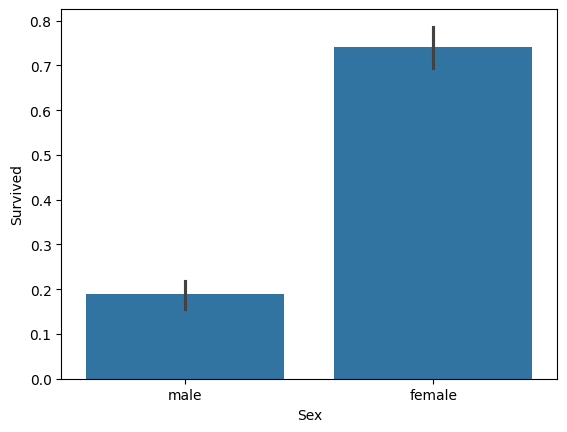

In [77]:
sns.barplot(x='Sex', y = 'Survived', data = titanic_df) # 그래프 그리기

<Axes: xlabel='Pclass', ylabel='Survived'>

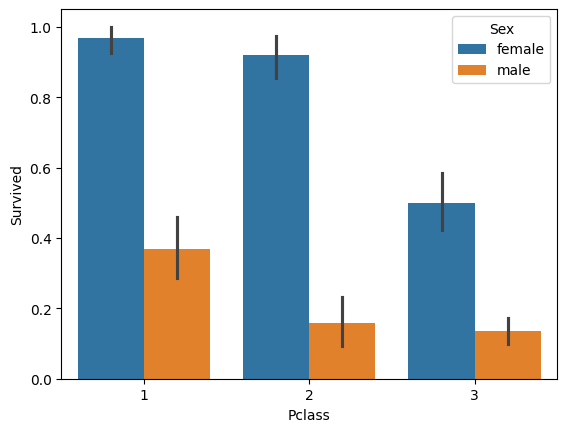

In [80]:
sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data = titanic_df) # 그래프 그리기

In [82]:
#함수 적용하기
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <=5: cat = 'Baby'
  elif age <=50: cat = 'Adult'
  else : cat = 'others'
  return cat

group_names = ['Unknown','Baby','Adult','others']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))


In [85]:
titanic_df['Age_cat']


0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887    Adult
888    Adult
889    Adult
890    Adult
Name: Age_cat, Length: 891, dtype: object

In [86]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


<Axes: xlabel='Age_cat', ylabel='Survived'>

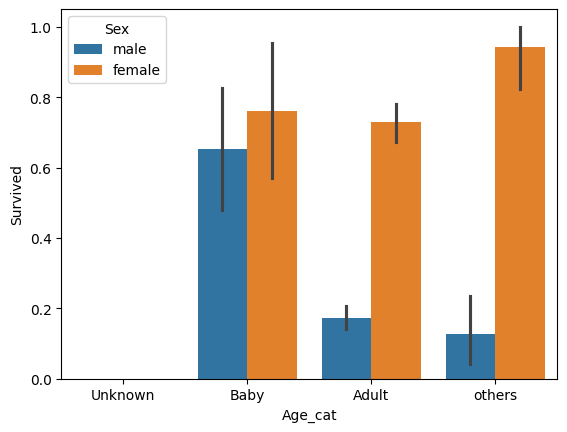

In [92]:
sns.barplot(x='Age_cat', y = 'Survived', data = titanic_df ,hue = 'Sex',order= group_names) # 그래프 그리기

In [89]:
titanic_df['Age_cat'].value_counts()

Adult     783
others     64
Baby       44
Name: Age_cat, dtype: int64

In [96]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [95]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder: 카테고리 유형을 0~. 숫자값으료 변환

In [99]:
def encode_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,146,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,146,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,146,S,Adult
